In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
import pprint
import json
import seaborn
from time import sleep
from datetime import date
import gmaps
from citipy import citipy
from api_keys import g_key
gmaps.configure(api_key=g_key)
import os
# Output File location
output_folder = "output_data"


In [2]:
# Allows me to control # of rows for faster testing
max_rows = 1000 

df = pd.read_csv('../source_data/detail_listings.zip', low_memory=False)
df.head()

rows_in_df = len(df)
print(f'Data set has {rows_in_df} rows')

# Drop unneeded columns:
df = df.drop(columns = [
    "listing_url", 
    "thumbnail_url", 
    "picture_url", 
    "medium_url", 
    "xl_picture_url", 
    "host_url", 
    "host_thumbnail_url", 
    "host_picture_url", 
    "scrape_id",
    "host_acceptance_rate" # NaN
])
for col in df.columns: 
    print(col)
    if "_url" in col:
        print(col) 

df.head(10)

Data set has 23745 rows
id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
host_id
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_is_superhost
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_nights_avg_ntm
maximum_nights_avg_ntm
calendar_updated
has_availability
availability_30
availability_60
availability_9

,id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5065,2019-12-04,MAUKA BB,"Perfect for your vacation, Staycation or just ...",Mauka B & B is 400 square feet studio with a p...,"Perfect for your vacation, Staycation or just ...",none,Neighbors here are friendly but are not really...,Located near by is Kalopa State Park with 100 ...,There is a bus stop located in Honoka'a town ...,...,f,f,moderate,f,f,2,2,0,0,0.45
1,5269,2019-12-05,Upcountry Hospitality in the 'Auwai Suite,"The 'Auwai Suite is a lovely, self-contained a...","The ‘Auwai Suite is a lovely, self-contained a...","The 'Auwai Suite is a lovely, self-contained a...",none,"We are located on the ""sunny side"" of Waimea, ...",NaN,One parking spot is provided with your stay.,...,t,f,strict_14_with_grace_period,f,f,5,4,1,0,0.09
2,5387,2019-12-04,Hale Koa Studio & 1 Bedroom Units!!,This Wonderful Spacious Studio apt/flat is in ...,"Hale Koa Duplex: This duplex has a wonderful, ...",This Wonderful Spacious Studio apt/flat is in ...,none,IN a Farm belt area with small commercial farm...,tropical setting with view and easy access to ...,"Close to Major highway (belt road) accessable,...",...,t,f,strict_14_with_grace_period,f,f,3,3,0,0,1.36
3,5389,2019-12-05,Keauhou Villa,It is less than 10 minute walk to the Keauhou ...,"Location: Keauhou, Kona Coast, Big Island, Haw...",It is less than 10 minute walk to the Keauhou ...,none,It is less than 10 minute walk to the Keauhou ...,It is less than 10 minute walk to the Keauhou ...,It is less than 10 minute walk to the Keauhou ...,...,f,f,flexible,f,f,3,3,0,0,0.23
4,5390,2019-12-05,STAY AT PRINCE KUHIO!,NaN,"Prince Kuhio, Studio Unit. Sleeps 2 privately....","Prince Kuhio, Studio Unit. Sleeps 2 privately....",none,NaN,NaN,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.01
5,5434,2019-12-04,Kauai Ocean View 3 Story Tiki Tower North Shore,"Hawaiian architecture , post and beam construc...","Our pristine and private 3 story, 3 bedroom, 2...","Hawaiian architecture , post and beam construc...",none,The resort community of Princeville has many t...,Hideaways beach is a beautiful scenic beach th...,It is best to rent a vehicle to experience the...,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.82
6,5480,2019-12-04,Isle Of You Naturally Farm Retreat,The Best Choice for your Nudist Retreat. Where...,"Hey, want to stay someplace real for your next...",The Best Choice for your Nudist Retreat. Where...,none,We are located on a rural one lane road going ...,NaN,You should hire a car to get you around the is...,...,f,f,strict_14_with_grace_period,f,f,3,0,3,0,NaN
7,5930,2019-12-05,Poipu Beach Guest House--- Orchid,Orchid is a first floor unit with private bat...,"From your front door, walk Southeast for just ...",Orchid is a first floor unit with private bat...,none,"One of the best locations on Kauai, on a smal...",County of Kauai Permit TVR 4265,NaN,...,t,f,moderate,f,f,4,1,3,0,1.54
8,7896,2019-12-05,Beachfront Maui Sunset Condo,"GREAT VALUE ON THE BEACH! Remodeled Condo, Tas...",Sleeps up to 4 people. The Maui Sunset beachfr...,"GREAT VALUE ON THE BEACH! Remodeled Condo, Tas...",none,Conveniently located to all the sights on the ...,Beachfront resort. Free parking. Bus stop outs...,A rental car is suggested. There is local bus ...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.25
9,8833,2019-12-04,Stay in the Heart of Kona,Our condo is located right across the street f...,Stay at the ROYAL KAHILI CONDOMINIUMS with a g...,Our condo is located right across the street f...,none,"Close to the heart of downtown Kona, but far e...",W (Phone number hidden by Airbnb),The best way t

In [3]:
df.describe()

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.374500e+04,2.374500e+04,23469.000000,23469.000000,23745.000000,23745.000000,23745.000000,23734.000000,23726.000000,23701.000000,...,18104.000000,18098.000000,18102.000000,18098.000000,18097.000000,23745.000000,23745.000000,23745.000000,23745.000000,18294.000000
mean,2.309861e+07,8.757279e+07,58.569517,58.569517,20.881056,-157.128280,4.602864,1.601068,1.544382,2.376862,...,9.518946,9.788319,9.749917,9.807769,9.430845,42.577090,41.767993,0.537039,0.043546,1.398526
std,1.102912e+07,7.746664e+07,123.722747,123.722747,0.790525,1.242902,2.386552,0.892971,1.148395,1.598890,...,0.838487,0.662549,0.710551,0.529936,0.855745,68.151171,68.403444,2.160893,0.541372,1.523295
min,5.065000e+03,9.080000e+02,0.000000,0.000000,18.920990,-159.714900,1.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.534072e+07,2.090564e+07,2.000000,2.000000,20.690630,-157.837800,3.000000,1.000000,1.000000,1.000000,...,9.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.000000,0.000000,0.000000,0.300000
50%,2.345470e+07,6.567843e+07,8.000000,8.000000,20.952780,-156.688670,4.000000,1.000000,1.000000,2.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,0.000000,0.000000,0.880000
75%,3.237924e+07,1.364377e+08,63.000000,63.000000,21.300390,-156.380400,6.000000,2.000000,2.000000,3.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,54.000000,51.000000,0.000000,0.000000,2.020000
max,4.057122e+07,3.141222e+08,1717.000000,1717.000000,22.229110,-154.815770,38.000000,14.000000,16.000000,38.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,279.000000,279.000000,31.000000,11.000000,22.600000


### Lance Code Starts Here

### Comparison between average rating given for properties by Island

In [4]:
# grouping by columns needed and taking average of ratings per island
average_rating_island = df.groupby("neighbourhood_group_cleansed").mean()["review_scores_rating"].sort_values(ascending=False)
average_rating_island.head()

neighbourhood_group_cleansed
Hawaii      95.483893
Maui        95.160074
Kauai       94.907945
Honolulu    93.690300
Name: review_scores_rating, dtype: float64

In [5]:
# create variables and dataframe for desired data and ability to sort later
islands = df["neighbourhood_group_cleansed"].unique()
sorted_island_df = pd.DataFrame({"Average Rating": average_rating_island})

# reset index to reference column in graph
sorted_island_df = sorted_island_df.reset_index()
sorted_island_df


,neighbourhood_group_cleansed,Average Rating
0,Hawaii,95.483893
1,Maui,95.160074
2,Kauai,94.907945
3,Honolulu,93.690300


<function matplotlib.pyplot.show(*args, **kw)>

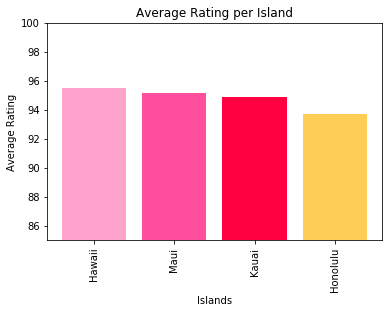

In [6]:
# set x and y axis for bar graph
x_axis = sorted_island_df["neighbourhood_group_cleansed"].unique()
y_axis = average_rating_island.sort_values(ascending=False)

# print lables/title and x/y limits to improve visual
plt.title("Average Rating per Island")
plt.xlabel("Islands")
plt.ylabel("Average Rating")
plt.xticks(rotation=90)
plt.ylim(85, 100)

# define color scheme
hawaiian_hibiscus_hex_palette = ["#ffa4cd", "#ff4e9e", "#ff0040", "#ffcd55", "#ffa700"]

# display graph
plt.bar(x_axis, y_axis, color = hawaiian_hibiscus_hex_palette)
plt.show

### Based on this graph, you can see that on average, ratings given are higher for properties on Hawaii island.

F_onewayResult(statistic=58.3071520719399, pvalue=1.6686226322176867e-37)

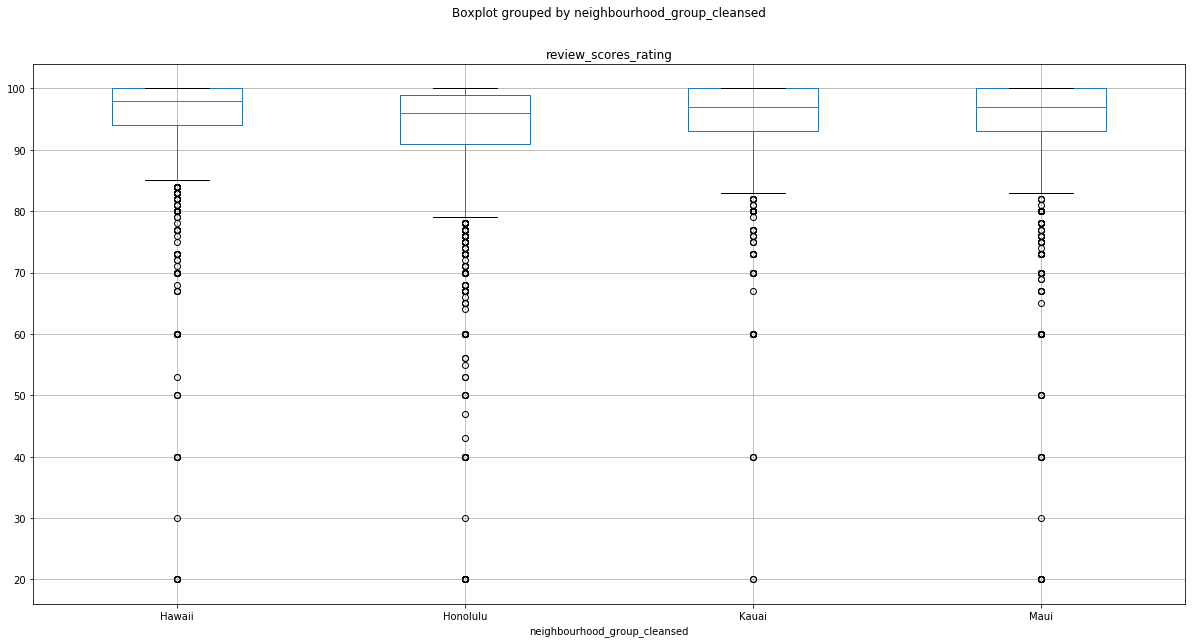

In [7]:
# numerical summary creation of box plot and anova
df.boxplot("review_scores_rating", by="neighbourhood_group_cleansed", figsize=(20, 10))
group1 = df[df["neighbourhood_group_cleansed"] == "Hawaii"]["review_scores_rating"].dropna()
group2 = df[df["neighbourhood_group_cleansed"] == "Maui"]["review_scores_rating"].dropna()
group3 = df[df["neighbourhood_group_cleansed"] == "Kauai"]["review_scores_rating"].dropna()
group4 = df[df["neighbourhood_group_cleansed"] == "Honolulu"]["review_scores_rating"].dropna()

stats.f_oneway(group1, group2, group3, group4)


### P value is less than 0.05 and therefore statistically significant and can reject our null hypothesis.

### Comparison between average rating given for properties by room type

In [8]:
# create variables and dataframe for desired data and ability to sort later
average_rating_room = df.groupby("room_type").mean()["review_scores_rating"].sort_values(ascending=False)
sorted_room_df = pd.DataFrame({"Average Rating": average_rating_room})

# reset index to reference column in graph
sorted_room_df = sorted_room_df.reset_index()
sorted_room_df

,room_type,Average Rating
0,Private room,94.951852
1,Entire home/apt,94.737967
2,Hotel room,93.774038
3,Shared room,91.917526


<function matplotlib.pyplot.show(*args, **kw)>

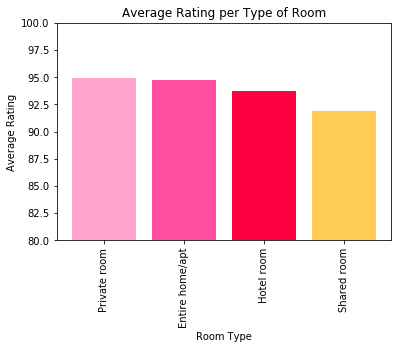

In [9]:
# set x and y axis for bar graph
x_axis = sorted_room_df["room_type"].unique()
y_axis = average_rating_room

# print lables/title and x/y limits to improve visual
plt.title("Average Rating per Type of Room")
plt.xlabel("Room Type")
plt.ylabel("Average Rating")
plt.xticks(rotation=90)
plt.ylim(80, 100)

# display graph
plt.bar(x_axis, y_axis, color = hawaiian_hibiscus_hex_palette)
plt.show

###### remove if cannot get to work

In [20]:
# numerical summary creation of anova
group1 = df[df["room_type"] == "Private Room"]["review_scores_rating"]
group2 = df[df["room_type"] == "Entire home/apt"]["review_scores_rating"]
group3 = df[df["room_type"] == "Hotel room"]["review_scores_rating"]
group4 = df[df["room_type"] == "Shared room"]["review_scores_rating"]

stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=nan, pvalue=nan)

### Heat map showing the location of the Airbnb listings based on rating scores.

In [14]:
# create variables to put in heat layer
locations = df[["latitude", "longitude"]]
humidity = df['review_scores_rating'].astype(float)

# set zoom level and coordinates based on hawaii coordinates
fig = gmaps.figure(center=(20.716179,-157.5828),zoom_level=7)

# create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=.02
                                )
# add heat layer
fig.add_layer(heat_layer)

# display figure
fig

Figure(layout=FigureLayout(height='420px'))

### Scatter plot showing Airbnb listings based on availability over a 365 day period.

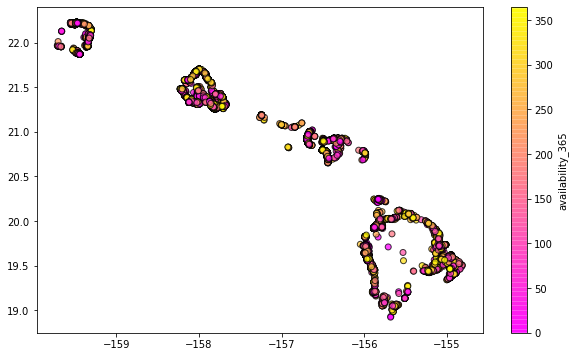

In [12]:
# creat scatter plot based on location and availability over 365 day period
plt.figure(figsize=(10,6))
plt.scatter(df.longitude, df.latitude, c=df.availability_365, cmap='spring', edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('availability_365')